In [2]:
from tensorflow.keras import layers 
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 
import tensorflow as tf


2024-04-20 18:38:07.981032: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-20 18:38:08.683845: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
d_train="FIDS30"
d_test='fruits-360/Test'

In [4]:
img_h=480
img_w=480

In [5]:
# Access the training dataset
train_dataset = tf.keras.utils.image_dataset_from_directory(
    d_train,
    shuffle=True,
    image_size=(img_h, img_w),  
    validation_split=0.2,
    subset="training",  # Use the training subset
    batch_size=32,
    seed=42  
)

# Access the validation dataset
validation_dataset = tf.keras.utils.image_dataset_from_directory(
    d_train,
    shuffle=True,
    image_size=(img_h, img_w),  
    validation_split=0.2,
    subset="validation",  # Use the validation subset
    batch_size=32,
    seed=42  
)


Found 971 files belonging to 30 classes.
Using 777 files for training.
Found 971 files belonging to 30 classes.
Using 194 files for validation.


2024-04-20 18:38:11.480433: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-04-20 18:38:11.481187: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


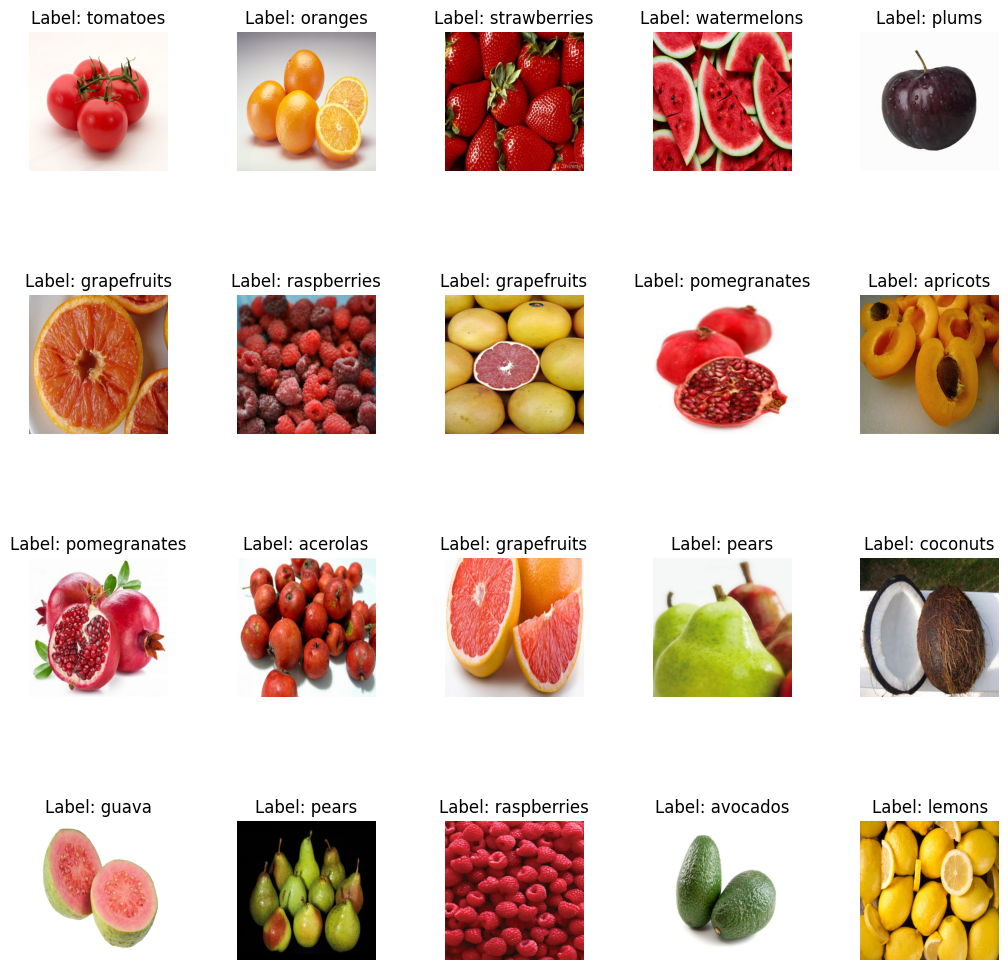

In [250]:
import matplotlib.pyplot as plt

# Visualize images from the training dataset
plt.figure(figsize=(10, 10))
for images, labels in train_dataset:
    for i in range(min(len(images), 20)):  # Ensure maximum of 20 subplots
        plt.subplot(4, 5, i+1)
        plt.imshow(images[i] / 255.0)  # Rescale pixel values to [0, 1]
        plt.title('Label: {}'.format(train_datalabels[i].numpy()))  # Access individual label
        plt.axis('off')  # Hide axis
    break  # Only visualize one batch
plt.tight_layout()
plt.subplots_adjust(wspace=0.5, hspace=0.5)  # Adjust spacing between subplots
plt.show()


In [251]:
from tensorflow.keras.models import Sequential

In [255]:
import tensorflow as tf
from tensorflow.keras import layers

# Load the Xception model with pre-trained weights and exclude the top classification layers
base_model = tf.keras.applications.Xception(include_top=False, weights='imagenet', input_shape=(480, 480, 3))

# Freeze the base model
base_model.trainable = False

# Define input layer with fixed shape
input_layer = tf.keras.layers.Input(shape=(480, 480, 3))

# Rescale pixel values to [0,1]
scaling_layer = layers.Rescaling(1./255)(input_layer)

# Pass input through base model
x = base_model(scaling_layer, training=False)

# Add global average pooling layer
x = layers.GlobalAveragePooling2D()(x)

# Add custom classification layers
dense_layer = tf.keras.layers.Dense(512, activation="relu")(x)
dropout_layer = tf.keras.layers.Dropout(0.5)(dense_layer)
output_layer = tf.keras.layers.Dense(30, activation="softmax")(dropout_layer)

# Create the model
model = tf.keras.Model(inputs=input_layer, outputs=output_layer)

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Assuming train_generator and validation_generator are correctly defined
hist = model.fit(train_dataset, epochs=10, validation_data=validation_dataset)


Epoch 1/10
 5/25 ━━━━━━━━━━━━━━━━━━━━ 2:59 9s/step - accuracy: 0.0843 - loss: 3.3792  

2024-04-20 01:04:45.919386: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


14/25 ━━━━━━━━━━━━━━━━━━━━ 1:40 9s/step - accuracy: 0.1650 - loss: 3.2014

2024-04-20 01:06:08.845845: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9s/step - accuracy: 0.2392 - loss: 3.0028

2024-04-20 01:07:46.169320: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


25/25 ━━━━━━━━━━━━━━━━━━━━ 287s 11s/step - accuracy: 0.2443 - loss: 2.9871 - val_accuracy: 0.5928 - val_loss: 1.6851
Epoch 2/10
 5/25 ━━━━━━━━━━━━━━━━━━━━ 3:08 9s/step - accuracy: 0.7115 - loss: 1.4730

2024-04-20 01:09:32.769548: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


14/25 ━━━━━━━━━━━━━━━━━━━━ 1:43 9s/step - accuracy: 0.6997 - loss: 1.3800

2024-04-20 01:10:57.871047: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9s/step - accuracy: 0.7035 - loss: 1.3038

2024-04-20 01:12:35.951572: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


25/25 ━━━━━━━━━━━━━━━━━━━━ 291s 12s/step - accuracy: 0.7041 - loss: 1.2983 - val_accuracy: 0.7062 - val_loss: 1.0326
Epoch 3/10
 5/25 ━━━━━━━━━━━━━━━━━━━━ 3:09 9s/step - accuracy: 0.8400 - loss: 0.6483

2024-04-20 01:14:23.433311: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


14/25 ━━━━━━━━━━━━━━━━━━━━ 1:44 10s/step - accuracy: 0.8144 - loss: 0.7353

2024-04-20 01:15:49.617622: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9s/step - accuracy: 0.8131 - loss: 0.7319 

2024-04-20 01:17:28.056079: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


25/25 ━━━━━━━━━━━━━━━━━━━━ 292s 12s/step - accuracy: 0.8131 - loss: 0.7308 - val_accuracy: 0.7423 - val_loss: 0.8314
Epoch 4/10
 5/25 ━━━━━━━━━━━━━━━━━━━━ 3:10 10s/step - accuracy: 0.8742 - loss: 0.4456

2024-04-20 01:19:15.409813: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


14/25 ━━━━━━━━━━━━━━━━━━━━ 1:44 10s/step - accuracy: 0.8692 - loss: 0.4741

2024-04-20 01:20:41.175261: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9s/step - accuracy: 0.8722 - loss: 0.4810 

2024-04-20 01:22:19.479344: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


25/25 ━━━━━━━━━━━━━━━━━━━━ 293s 12s/step - accuracy: 0.8724 - loss: 0.4811 - val_accuracy: 0.8144 - val_loss: 0.6639
Epoch 5/10
 5/25 ━━━━━━━━━━━━━━━━━━━━ 3:10 10s/step - accuracy: 0.8884 - loss: 0.4297

2024-04-20 01:24:08.440356: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


14/25 ━━━━━━━━━━━━━━━━━━━━ 1:44 10s/step - accuracy: 0.8886 - loss: 0.4239

2024-04-20 01:25:34.294199: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9s/step - accuracy: 0.8927 - loss: 0.4135 

2024-04-20 01:27:12.685500: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


25/25 ━━━━━━━━━━━━━━━━━━━━ 293s 12s/step - accuracy: 0.8930 - loss: 0.4127 - val_accuracy: 0.8144 - val_loss: 0.6428
Epoch 6/10
 5/25 ━━━━━━━━━━━━━━━━━━━━ 3:10 10s/step - accuracy: 0.9005 - loss: 0.3735

2024-04-20 01:29:00.501029: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


14/25 ━━━━━━━━━━━━━━━━━━━━ 1:45 10s/step - accuracy: 0.9128 - loss: 0.3568

2024-04-20 01:30:26.602063: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9s/step - accuracy: 0.9171 - loss: 0.3426 

2024-04-20 01:32:05.007895: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


25/25 ━━━━━━━━━━━━━━━━━━━━ 293s 12s/step - accuracy: 0.9174 - loss: 0.3414 - val_accuracy: 0.8093 - val_loss: 0.6048
Epoch 7/10
 5/25 ━━━━━━━━━━━━━━━━━━━━ 3:10 10s/step - accuracy: 0.9198 - loss: 0.3198

2024-04-20 01:33:53.245215: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


14/25 ━━━━━━━━━━━━━━━━━━━━ 1:45 10s/step - accuracy: 0.9114 - loss: 0.3228

2024-04-20 01:35:19.220416: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9s/step - accuracy: 0.9142 - loss: 0.3113 

2024-04-20 01:36:57.476145: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


25/25 ━━━━━━━━━━━━━━━━━━━━ 292s 12s/step - accuracy: 0.9143 - loss: 0.3104 - val_accuracy: 0.8505 - val_loss: 0.5618
Epoch 8/10
 5/25 ━━━━━━━━━━━━━━━━━━━━ 3:10 10s/step - accuracy: 0.9328 - loss: 0.2163

2024-04-20 01:38:45.002430: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


14/25 ━━━━━━━━━━━━━━━━━━━━ 1:44 10s/step - accuracy: 0.9252 - loss: 0.2399

2024-04-20 01:40:10.872866: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9s/step - accuracy: 0.9262 - loss: 0.2423 

2024-04-20 01:41:48.891879: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


25/25 ━━━━━━━━━━━━━━━━━━━━ 291s 12s/step - accuracy: 0.9264 - loss: 0.2421 - val_accuracy: 0.8454 - val_loss: 0.5536
Epoch 9/10
 5/25 ━━━━━━━━━━━━━━━━━━━━ 3:10 10s/step - accuracy: 0.9185 - loss: 0.2412

2024-04-20 01:43:36.271725: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


14/25 ━━━━━━━━━━━━━━━━━━━━ 1:44 10s/step - accuracy: 0.9339 - loss: 0.2201

2024-04-20 01:45:02.089294: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9s/step - accuracy: 0.9420 - loss: 0.2070 

2024-04-20 01:46:41.992290: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


25/25 ━━━━━━━━━━━━━━━━━━━━ 294s 12s/step - accuracy: 0.9425 - loss: 0.2060 - val_accuracy: 0.8557 - val_loss: 0.5641
Epoch 10/10
 5/25 ━━━━━━━━━━━━━━━━━━━━ 3:11 10s/step - accuracy: 0.9740 - loss: 0.1309

2024-04-20 01:48:30.439106: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


14/25 ━━━━━━━━━━━━━━━━━━━━ 1:45 10s/step - accuracy: 0.9732 - loss: 0.1426

2024-04-20 01:49:56.636730: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9s/step - accuracy: 0.9728 - loss: 0.1452 

2024-04-20 01:51:35.165332: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


25/25 ━━━━━━━━━━━━━━━━━━━━ 293s 12s/step - accuracy: 0.9728 - loss: 0.1452 - val_accuracy: 0.8660 - val_loss: 0.4824


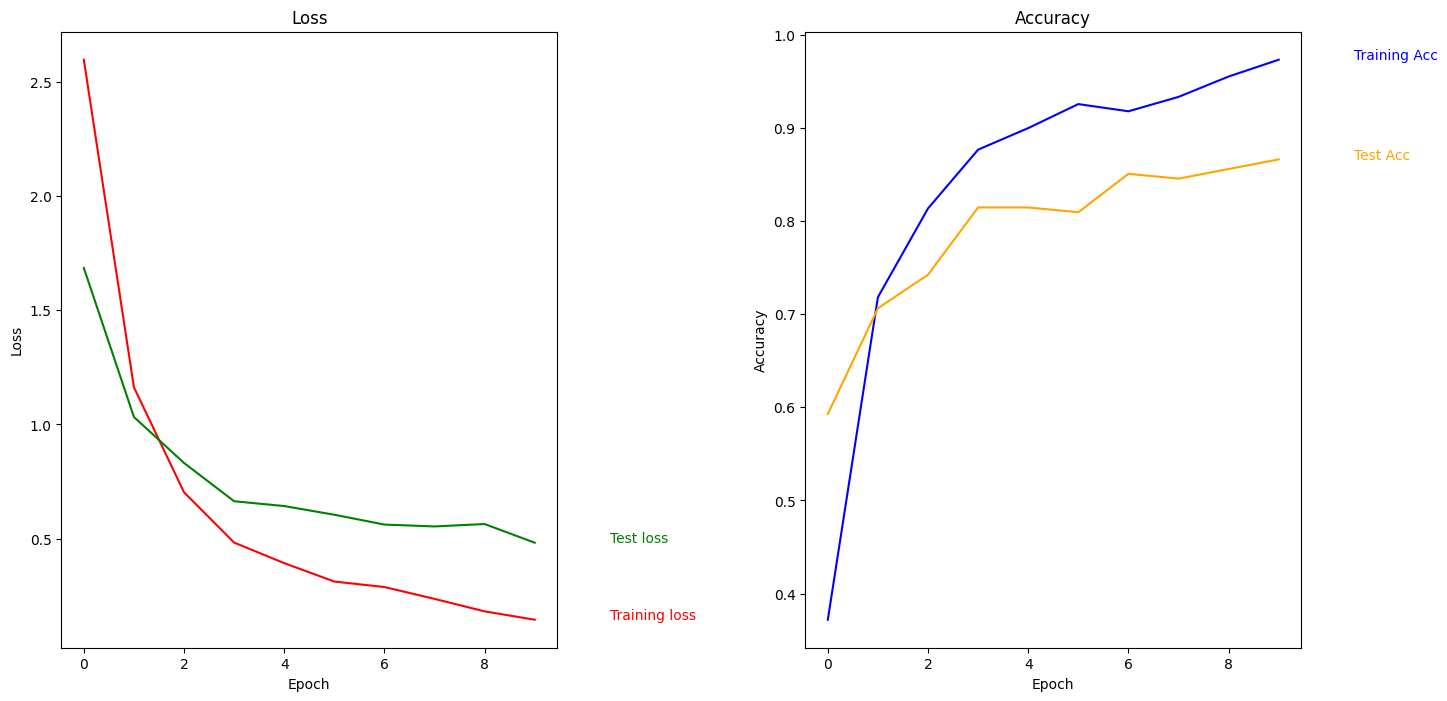

In [256]:

epoch_r = range(10)

plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 2)

plt.plot(epoch_r, hist.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(epoch_r, hist.history['val_accuracy'], label='Test Accuracy', color='orange')

plt.title("Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")

plt.text(10.5, hist.history['accuracy'][-1], 'Training Acc', color='blue')
plt.text(10.5, hist.history['val_accuracy'][-1], 'Test Acc', color='orange')
plt.subplot(1, 2, 1)

plt.plot(epoch_r, hist.history['loss'], label='Training Accuracy', color='red')
plt.plot(epoch_r, hist.history['val_loss'], label='Test Accuracy', color='green')

plt.title("Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.text(10.5, hist.history['loss'][-1], 'Training loss', color='red')
plt.text(10.5, hist.history['val_loss'][-1], 'Test loss', color='green')
plt.subplots_adjust(wspace=0.5)
plt.show()




In [7]:
c_names=train_dataset.class_names
c_names

['acerolas',
 'apples',
 'apricots',
 'avocados',
 'bananas',
 'blackberries',
 'blueberries',
 'cantaloupes',
 'cherries',
 'coconuts',
 'figs',
 'grapefruits',
 'grapes',
 'guava',
 'kiwifruit',
 'lemons',
 'limes',
 'mangos',
 'olives',
 'oranges',
 'passionfruit',
 'peaches',
 'pears',
 'pineapples',
 'plums',
 'pomegranates',
 'raspberries',
 'strawberries',
 'tomatoes',
 'watermelons']

In [318]:
img=tf.keras.utils.load_img("b.jpg",target_size=(480,480))
img_array = tf.keras.utils.array_to_img(img)
img_array = tf.expand_dims(img_array, axis=0)  # Expand dimensions to create a batch

# Make predictions

predictions = model.predict(img_array)

predicted_class =top_three_indices = tf.math.top_k(predictions, k=3)
class_name = c_names[predicted_class.indices[0][0]]
accuracy = predicted_class.values[0][0].numpy() * 100

print(f"Predicted class: {class_name} with accuracy of {accuracy:.2f}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step
Predicted class: bananas with accuracy of 98.67%


In [309]:
predicted_class.values

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[0.9866866 , 0.00808263, 0.00270621]], dtype=float32)>

In [319]:
model.save("Fruit_classifer.keras")

In [329]:
print(f"Model has {hist.history['accuracy'][-1]*100:.2f}% accuracy on Training and {hist.history['val_accuracy'][-1]*100:.2f}% on Validation")


Model has 97.30% accuracy on Training and 86.60% on Validation


In [323]:
model.summary

<bound method Model.summary of <Functional name=functional_59, built=True>>

In [5]:
a=['acerolas', 'apples', 'apricots', 'avocados', 'bananas','blackberries', 'blueberries', 'cantaloupes', 'cherries', 'coconuts', 'figs', 'grapefruits', 'grapes', 'guava', 'kiwifruit', 'lemons', 'limes', 'mangos', 'olives', 'oranges', 'passionfruit', 'peaches', 'pears', 'pineapples', 'plums', 'pomegranates', 'raspberries', 'strawberries', 'tomatoes', 'watermelons']


In [6]:
a

['acerolas',
 'apples',
 'apricots',
 'avocados',
 'bananas',
 'blackberries',
 'blueberries',
 'cantaloupes',
 'cherries',
 'coconuts',
 'figs',
 'grapefruits',
 'grapes',
 'guava',
 'kiwifruit',
 'lemons',
 'limes',
 'mangos',
 'olives',
 'oranges',
 'passionfruit',
 'peaches',
 'pears',
 'pineapples',
 'plums',
 'pomegranates',
 'raspberries',
 'strawberries',
 'tomatoes',
 'watermelons']